# Linear Regression in Python


Written by: M.Danish Azeem\
Date: 01.13.2024\
Email: danishazeem365@gmail.com

# Regression in scikit-learn

In [1]:
# import librases
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot

# other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.dtypes


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [4]:
df['fare'].min()

0.0

In [5]:
# simple linear regression
x= df[['age']]   # x is always in double dimention
y = df['fare']

In [6]:
df_linear = df[["age", "fare"]]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [7]:
df_linear.age.fillna(value = df_linear['age'].mean(), inplace=True)

C:\Users\Danish\AppData\Local\Temp\ipykernel_12812\1602816702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value = df_linear['age'].mean(), inplace=True)


In [8]:
x

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [9]:
df_linear.isnull().sum() / len(df_linear) *100

age     0.0
fare    0.0
dtype: float64

In [10]:
# y.isnull().sum() / len(y) *100

In [11]:
y.isnull().sum()

0

In [12]:
x.shape

(891, 1)

In [13]:
y.shape

(891,)

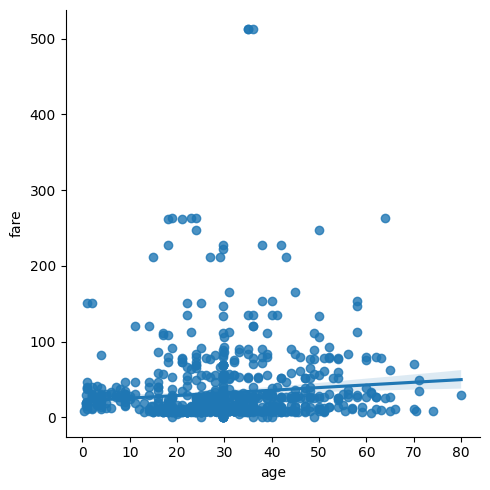

In [14]:
sns.lmplot(data=df_linear, x='age', y='fare')

# we can Remove outliers using this method
### df_linear = df_linear[(df_linear['age'] > 8) & (df_linear['age'] > 55)]
### df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] > 35)]


<Axes: ylabel='age'>

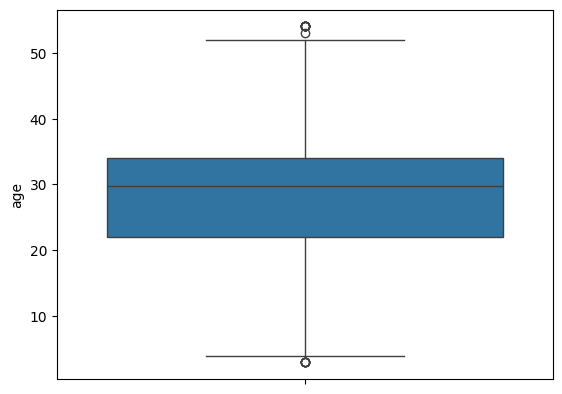

In [16]:
sns.boxplot(data=df_linear, y='age')  

In [15]:
# Remove outliers using the IQR method
Q1 = df_linear['age'].quantile(0.25)
Q3 = df_linear['age'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_linear = df_linear[(df_linear['age'] > lower_bound) & (df_linear['age'] < upper_bound)]  # df_filtered = df[df['age'].between(lower_bound, upper_bound)]


<Axes: ylabel='fare'>

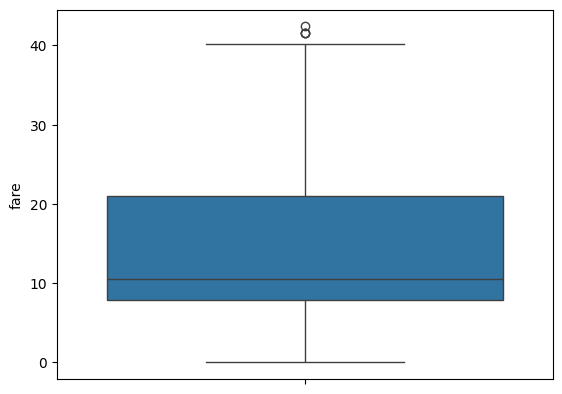

In [23]:
sns.boxplot(data=df_linear, y='fare')

In [22]:
Q1 = df_linear['fare'].quantile(0.25)
Q3 = df_linear['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_linear = df_linear[(df_linear['fare'] > lower_bound) & (df_linear['fare'] < upper_bound)]  # df_filtered = df[df['age'].between(lower_bound, upper_bound)]


# we can normlize data

In [24]:
x = df_linear[['age']]   # use double bracket in it
y = df_linear['fare']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# model bula len
model = LinearRegression()

# train the model
model.fit(x,y)

#prediction
model.predict([[80]]) 


c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.98801026])

In [27]:
#model evalution with metrics
# r2
# mean squared error
# MAE
# RMSE

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8)

# model
model = LinearRegression()

# train
model.fit(x_train, y_train)

# prediction
predictions = model.predict(x_test)


<Axes: xlabel='fare'>

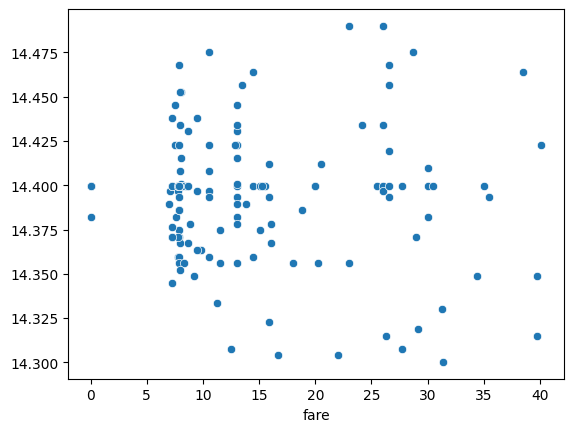

In [28]:
sns.scatterplot(x= y_test, y= predictions)   # prediction is chak by graphs

## The R-squared score ranges from 0 to 1, where:

0: The model's predictions are no better than random guesses.\
1: The model perfectly predicts the target values.

In [29]:
model.score(x_test, y_test)   # prediction is chak by score

-0.006255069602693508

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE = mean_absolute_error(y_true=y_test, y_pred=predictions)
MSE = mean_squared_error(y_true=y_test, y_pred=predictions)
RMSE = mean_squared_error(y_true=y_test, y_pred=predictions, squared= False)
R2 = r2_score(y_true=y_test, y_pred=predictions)

print("MAE: ", MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)
print("R_squared: ",R2)

MAE:  7.350799607660657
MSE:  85.93004644803563
RMSE:  9.269846085455553
R_squared:  -0.006255069602693508


In [31]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

9.269846085455553

# what is model.score in sikit-learn in regression?



In scikit-learn, the `model.score` method is used to calculate the coefficient of determination, \( R^2 \), for regression models. The \( R^2 \) score is a measure of how well the predictions of the model match the actual outcomes of the data. It provides an indication of the goodness of fit of the model.

For regression models, the `score` method in scikit-learn returns the \( R^2 \) score by default. The \( R^2 \) score is defined as:

\[ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \]

where:
- \( y_i \) is the actual value of the dependent variable for observation \( i \).
- \( \hat{y}_i \) is the predicted value of the dependent variable for observation \( i \).
- \( \bar{y} \) is the mean of the actual values of the dependent variable.
- \( n \) is the number of observations.

The \( R^2 \) score ranges from 0 to 1, where 1 indicates a perfect fit (predictions match the actual values) and 0 indicates that the model does not perform better than predicting the mean of the dependent variable.



# Assighnment #1
# Time stamp   01:02:45

 # regression matrics and their predictions. is this model answer predict good or not: what are the  correct values for good model :    
 
 MAE:  6.850340504423807\
MSE:  80.30535133301439\
RMSE:  8.961325311192223\
R_squared:  -0.02405014033542141


 **Here's an analysis of the provided regression metrics and whether the model is predicting well:**

**1. MAE (Mean Absolute Error):**

- Value: 6.850340504423807
- Interpretation: On average, the model's predictions are off by about 6.85 units from the actual values.
- Context: Whether this is good or bad depends on the scale of your target variable. If the values in your target variable typically range from 0 to 100, a MAE of 6.85 might be acceptable. But if the values range from 0 to 10, it would be less desirable.

**2. MSE (Mean Squared Error):**

- Value: 80.30535133301439
- Interpretation: This measures the average squared difference between the predictions and actual values. It's often used for optimization purposes, as it penalizes larger errors more heavily than MAE.
- Context: Lower MSE generally indicates better model performance, but it's hard to interpret in isolation without knowing the scale of your target variable.

**3. RMSE (Root Mean Squared Error):**

- Value: 8.961325311192223
- Interpretation: This is the square root of MSE, so it's in the same units as the target variable. It gives a sense of the average magnitude of the errors.
- Context: In this case, the RMSE of 8.96 suggests that the model's predictions are typically off by about 8.96 units.

**4. R_squared (R-squared):**

- Value: -0.02405014033542141
- Interpretation: This metric measures how much of the variance in the target variable is explained by the model. Values range from 0 to 1, with 1 indicating perfect fit. Negative R-squared values are possible, indicating that the model is worse than simply predicting the mean of the target variable.
- Context: A negative R-squared of -0.024 suggests that the model is not performing well. It's not capturing much of the variability in the target variable.

**Overall Assessment:**

- Based on the provided metrics, especially the negative R-squared, the model is not predicting well. It's not capturing the patterns in the data effectively.

**However, here's a general guideline for interpreting these metrics:**

**R²:**

* **0.7-0.9:** Good
* **0.4-0.7:** Moderate
* **0.2-0.4:** Weak
* **<0.2:** Poor

**MAE, MSE, RMSE:**

* **Lower values are better.** However, the "good" range depends on the scale 

**Next Steps:**

- **Review feature engineering:** Consider whether you can improve the features you're using to train the model.
- **Try different algorithms:** Explore other regression algorithms that might be better suited to your problem.
- **Fine-tune hyperparameters:** Experiment with different settings for the model's hyperparameters to see if you can improve performance.
- **Address potential issues:** Look for signs of overfitting, underfitting, or data quality problems that could be affecting the results.



# Assighnment #2
# Time stamp   01:03:52

 # load "iris" data and do multilenear regression and use Decision Trees for Classification predection


 

In [74]:
x_train.shape     # 80% data is here

(441, 1)

In [75]:
x_test.shape   # 20% data is here

(111, 1)

In [76]:
x.shape

(552, 1)